In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer

interim_folder = './interim_data/'
num_clusters = 6
num_features = 20

all_data = pd.read_pickle(interim_folder + 'all.pkl')
lb = MultiLabelBinarizer()
Y = lb.fit_transform(all_data.tags)
train_data, test_data, Y_train, Y_test = train_test_split(all_data["text"], Y, test_size=0.3, random_state=42)

gwbowv_name = "SDV_" + str(num_clusters) + "cluster_" + str(num_features) + "feature_matrix_gmm_sparse.npy"
gwbowv = np.load(interim_folder + gwbowv_name)

test_gwbowv_name = "TEST_SDV_" + str(num_clusters) + "cluster_" + str(num_features) + "feature_matrix_gmm_sparse.npy"
gwbowv_test = np.load(interim_folder + test_gwbowv_name)

In [2]:
print(all_data.shape)
print(train_data.shape)
print(test_data.shape)
print('growbowv', gwbowv.shape)
print('growbowv_test', gwbowv_test.shape)

(2786, 2)
(1950,)
(836,)
growbowv (1950, 120)
growbowv_test (836, 120)


In [3]:
from sklearn.metrics.pairwise import cosine_similarity

similarities_calc_result = []
confidence = 0.98

for item_index, item in enumerate(gwbowv):
    # calculate cosine similarities
    similarities = cosine_similarity([item], gwbowv)

    # sort in ascending order
    similarities_indices =similarities.argsort()[0][-2:-12:-1]

    # cocine similarities Iteration
    for sim_index in similarities_indices:
        similarity = similarities[0][sim_index]

        # if similarity is higher than confidence, save it to result object
        if similarity > confidence and  similarity < 1:
        #if similarity == 1:
            similarities_calc_result.append([int(item_index), sim_index, similarity])

In [5]:
similarities_calc_result

# reset = train_data.reset_index(drop=True)
# print(reset[10],"\n\n", reset[569])

[[0, 582, 0.99581796],
 [0, 194, 0.9957149],
 [0, 1813, 0.994172],
 [0, 1182, 0.99401045],
 [0, 118, 0.99361],
 [0, 805, 0.9933633],
 [0, 1501, 0.99314225],
 [0, 1537, 0.9929886],
 [0, 1692, 0.9927342],
 [0, 719, 0.99250674],
 [3, 1912, 0.9965336],
 [3, 773, 0.99560684],
 [3, 905, 0.9954599],
 [3, 587, 0.9949825],
 [3, 1167, 0.9948549],
 [3, 866, 0.9944857],
 [3, 1636, 0.9941757],
 [3, 1238, 0.9934697],
 [3, 996, 0.9930689],
 [3, 1243, 0.9930348],
 [5, 139, 0.9959348],
 [5, 1529, 0.995675],
 [5, 791, 0.99490714],
 [5, 785, 0.99488854],
 [5, 1309, 0.99481237],
 [5, 1619, 0.9947475],
 [5, 899, 0.99469084],
 [5, 308, 0.994676],
 [5, 1707, 0.994616],
 [5, 1095, 0.9943004],
 [9, 526, 0.9913955],
 [9, 130, 0.991169],
 [9, 1428, 0.9904845],
 [9, 137, 0.990429],
 [9, 822, 0.9902401],
 [9, 1429, 0.989746],
 [9, 744, 0.9897078],
 [9, 244, 0.98961604],
 [9, 501, 0.98929095],
 [9, 1388, 0.98894817],
 [33, 203, 0.98036695],
 [34, 1358, 0.9952092],
 [34, 699, 0.9924978],
 [34, 456, 0.98894835],
 [34

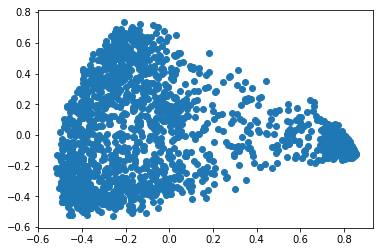

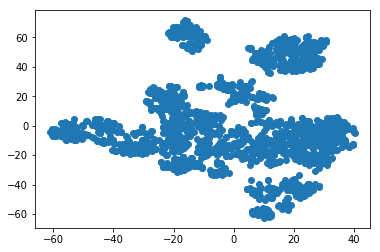

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

X_reduced = PCA(n_components=2).fit_transform(gwbowv)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])
plt.show()

X_reduced = TSNE(n_components=2, random_state=0).fit_transform(gwbowv)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])
plt.show()